In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/postprocessing_dict.pkl', 'rb') as f:
    postprocessing_results = pickle.load(f)

In [3]:
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results_obj = pickle.load(f)

In [4]:
preprocessing_results_obj['training']['predictions']

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_m,Moments_rep1_ll,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,...,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,Dadi_rep2_m,Dadi_rep2_ll,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_m,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,568.184524,-47775.332252,-3.096293e+07,-2.350519e+05,3.268639e+07,-280032.273433,...,2305.214366,4579.664504,1048.861969,372.650552,-15387.674793,3772.592111,6149.382967,1952.713335,5.410461e-07,18340.982292
Sim_1,17199.757558,3675.237517,12149.024291,1614.606744,405.676704,-186936.798841,-5.833645e+06,-4.010803e+05,2.463077e+07,0.000000,...,4025.421201,3932.098932,3189.450839,1126.975102,-63789.098979,9670.775190,3809.999622,3034.968035,5.314941e-07,18475.007366
Sim_2,20992.657820,2037.055635,11085.596509,1167.047345,896.812272,-132599.969905,-3.580451e+07,-7.269977e+05,9.400295e+07,-112331.240567,...,2324.022921,8218.992792,1609.952074,544.594905,-91385.579362,9106.083961,7921.145834,3879.015464,4.773448e-07,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,976.344902,-12142.984030,-2.200687e+07,-2.195852e+05,4.775351e+07,-104314.546589,...,2788.616759,6631.887628,1222.623864,605.380218,-12212.093743,1896.365453,6803.138211,1126.946015,7.476578e-07,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,815.752634,-65579.572102,-7.145964e+06,-1.014322e+05,8.393800e+06,-108700.122201,...,1482.091042,2911.869288,714.133761,1015.452692,-53762.001157,7364.649220,3765.812916,1651.710342,1.014999e-06,9982.779835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,11447.629405,1691.199547,938.322640,-39290.044466,-9.138877e+06,-6.551062e+04,1.341683e+07,-122959.387681,...,1665.397782,9300.392127,715.574421,652.880633,-36317.474290,5702.130219,9196.466011,1874.630489,7.137621e-07,13671.773958
Sim_3996,15678.876016,1016.565518,21300.033893,797.525852,423.714571,-96296.410871,-8.573738e+07,-5.022361e+04,1.099910e+08,-265760.977638,...,4487.696668,10703.636605,2048.282272,553.156625,-22499.650080,2966.689740,5473.524548,941.981215,6.004355e-07,17148.553463
Sim_3997,12897.416422,2788.273579,12647.829118,1354.518860,786.225974,-139778.875604,-4.981668e+06,-1.559490e+05,1.502321e+07,-88335.000761,...,3849.067681,2362.399052,2521.918619,617.240293,-58196.601943,9848.646604,4299.149542,2877.147793,7.379718e-07,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,256.178618,-68544.362925,-1.720310e+07,-3.362811e+05,1.692437e+07,0.000000,...,2559.803095,1688.087105,641.991929,504.417850,-85135.911749,5172.524489,4746.217267,3615.260545,9.339483e-07,11317.675001


I want to make the postprocessing object look EXACTLY like the preprocessing object

In [5]:
import numpy as np
import pandas as pd
import json
from scipy.stats import zscore


def postprocessing(experiment_config, training_features, training_targets, validation_features, validation_targets):

    # Load data and config
    training_features = pd.read_csv(training_features, index_col=0)
    validation_features = pd.read_csv(validation_features, index_col=0)
    training_targets = pd.read_csv(training_targets, index_col=0)
    validation_targets = pd.read_csv(validation_targets, index_col=0)

    with open(experiment_config, "r") as f:
        experiment_config = json.load(f)

    postprocessing_dict = {
        'parameter_names': training_features.columns.tolist(),
        'target_names': training_targets.columns.tolist()
    }

    features_dict = {'training': training_features, 'validation': validation_features}
    targets_dict = {'training': training_targets, 'validation': validation_targets}

    # Define parameters to process
    param_types = ['Na', 'N1', 'N2', 't_split', 'm']

    for stage in ['training', 'validation']:
        features = features_dict[stage]
        targets = targets_dict[stage]
        outliers_imputed = None
        

        print(f"\nProcessing {stage} data:")

        if experiment_config['remove_outliers']:
            for param in param_types:
                # Get bounds
                lower_bound = experiment_config['lower_bound_params'].get(param)
                upper_bound = experiment_config['upper_bound_params'].get(param)

                if lower_bound is None or upper_bound is None:
                    continue

                # Find all columns ending with this parameter
                param_cols = [col for col in features.columns if col.endswith('_' + param)]
                
                for col in param_cols:
                    # Identify outliers
                    outlier_mask = (features[col] < lower_bound) | (features[col] > upper_bound)
                    valid_mask = ~outlier_mask

                    if outlier_mask.any():
                        # Use median of valid values only
                        valid_median = features.loc[valid_mask, col].median()
                        features.loc[outlier_mask, col] = valid_median
                        # print(f"{col}: Replaced {outlier_mask.sum()} outliers. New range: [{features[col].min():.3f}, {features[col].max():.3f}]")

            outliers_imputed = features.copy()

        if experiment_config['normalization']:
            print("===> Normalizing the data.")
            
            # Normalize targets column by column using corresponding bounds
            normalized_targets = targets.copy()
            for param in experiment_config['parameter_names']:
                lower_bound = experiment_config['lower_bound_params'][param]
                upper_bound = experiment_config['upper_bound_params'][param]
                mean = 0.5 * (upper_bound + lower_bound)
                std = (upper_bound - lower_bound) / np.sqrt(12)
                target_col = f'simulated_params_{param}'
                normalized_targets[target_col] = (targets[target_col] - mean) / std
            
            # Normalize parameter features using same bounds
            features_copy = features.copy()
            for param in ['Na', 'N1', 'N2', 't_split', 'm']:
                param_cols = [col for col in features.columns if col.endswith('_' + param)]
                lower_bound = experiment_config['lower_bound_params'][param]
                upper_bound = experiment_config['upper_bound_params'][param]
                mean = 0.5 * (upper_bound + lower_bound)
                std = (upper_bound - lower_bound) / np.sqrt(12)
                
                for col in param_cols:
                    features_copy[col] = (features[col] - mean) / std

            postprocessing_dict[stage] = {
                "normalization": experiment_config['normalization'],
                "predictions": outliers_imputed if outliers_imputed is not None else features_dict[stage],
                "normalized_predictions": features_copy,
                "targets": targets,
                "normalized_targets": normalized_targets
            }
            
        else:
            postprocessing_dict[stage] = {
                "normalization": experiment_config['normalization'],
                "predictions": outliers_imputed if outliers_imputed is not None else features_dict[stage],
                "normalized_predictions": None,
                "targets": targets,
                "normalized_targets": None
            }

    return postprocessing_dict



In [6]:
experiment_config = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
training_features = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/training_features.csv'
training_targets = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/training_targets.csv'
validation_features = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/validation_features.csv'
validation_targets = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/validation_targets.csv'

In [7]:
postprocessing_dict = postprocessing(experiment_config, training_features, training_targets, validation_features, validation_targets)


Processing training data:
===> Normalizing the data.

Processing validation data:
===> Normalizing the data.


Text(0, 0.5, 'True')

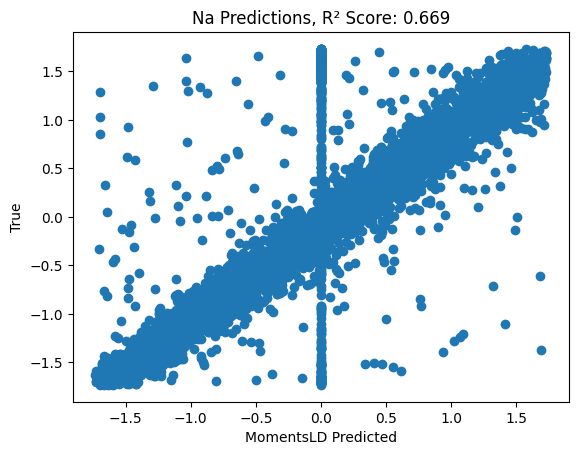

In [8]:
plt.figure()
plt.scatter(postprocessing_dict['training']['normalized_predictions']['MomentsLD_Na'],postprocessing_dict['training']['normalized_targets']['simulated_params_Na'] )

r2 = r2_score(postprocessing_dict['training']['normalized_predictions']['MomentsLD_Na'],
              postprocessing_dict['training']['normalized_targets']['simulated_params_Na']
              )

plt.title(f'Na Predictions, R² Score: {r2:.3f}')
plt.xlabel('MomentsLD Predicted')
plt.ylabel('True')

In [9]:
postprocessing_dict['training']['normalized_predictions']['MomentsLD_N1']

Sim_0      -0.446977
Sim_1       1.616852
Sim_2       1.419261
Sim_3      -1.103486
Sim_4       0.809917
              ...   
Sim_3995    0.228186
Sim_3996   -0.728970
Sim_3997    1.679091
Sim_3998    0.042872
Sim_3999   -0.853630
Name: MomentsLD_N1, Length: 4000, dtype: float64

In [10]:
postprocessing_dict['training']['normalized_targets']['simulated_params_N1']

Sim_0      -0.486724
Sim_1       1.694261
Sim_2       1.329305
Sim_3      -1.049728
Sim_4       0.795694
              ...   
Sim_3995    0.242487
Sim_3996   -0.702968
Sim_3997    1.716305
Sim_3998   -0.023094
Sim_3999   -0.876523
Name: simulated_params_N1, Length: 4000, dtype: float64

Text(0, 0.5, 'True')

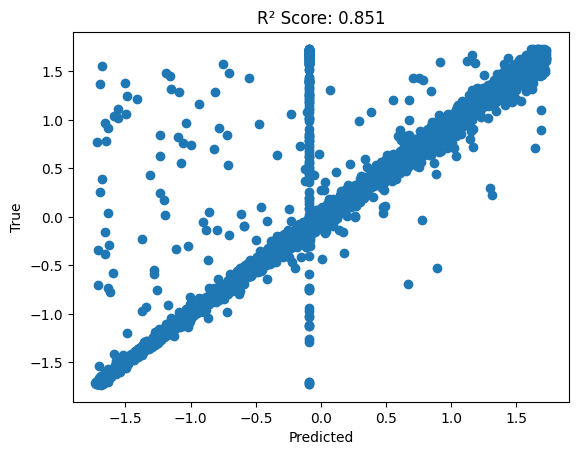

In [11]:
plt.figure()
plt.scatter(postprocessing_dict['training']['normalized_predictions']['MomentsLD_t_split'],postprocessing_dict['training']['normalized_targets']['simulated_params_t_split'] )

r2 = r2_score(postprocessing_dict['training']['normalized_predictions']['MomentsLD_t_split'],
              postprocessing_dict['training']['normalized_targets']['simulated_params_t_split']
              )

plt.title(f'R² Score: {r2:.3f}')
plt.xlabel('Predicted')
plt.ylabel('True')

In [12]:
len(postprocessing_dict['training']['normalized_predictions'].columns)

49

In [13]:
postprocessing_dict['training']['normalized_targets'].columns

Index(['simulated_params_t_split', 'simulated_params_N1',
       'simulated_params_N2', 'simulated_params_Na', 'simulated_params_m'],
      dtype='object')

MSE Values and Standard Errors:
          Moments  Moments_std_err      Dadi  Dadi_std_err  MomentsLD  \
N1       2.254015         0.027179  1.796064      0.023633   0.115280   
N2       1.684775         0.022687  0.856122      0.011961   0.135852   
Na       0.748821         0.012768  0.763167      0.012364   0.271321   
t_split  1.735071         0.022385  1.120917      0.017218   0.143705   

         MomentsLD_std_err  
N1                0.008633  
N2                0.009313  
Na                0.012232  
t_split           0.011141  


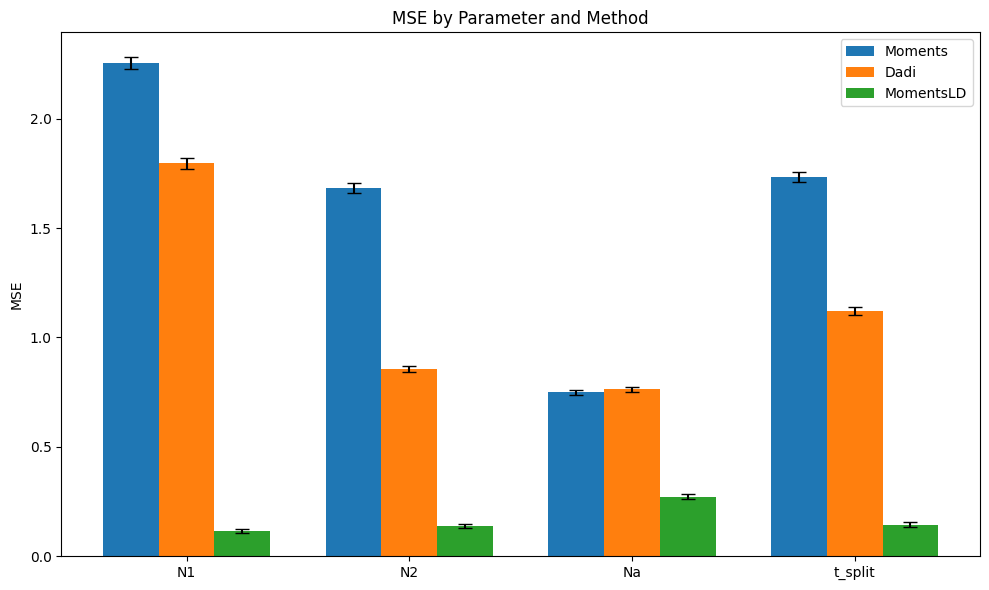

In [14]:
# Calculate MSE and standard errors for each parameter and method
# Calculate MSE and standard errors across simulations
params = ['N1', 'N2', 'Na', 't_split']
methods = ['Moments', 'Dadi', 'MomentsLD']
mse_values = {}
mse_errors = {}

for param in params:
   mse_values[param] = {}
   mse_errors[param] = {}
   target_col = f'simulated_params_{param}'
   target_values = postprocessing_dict['training']['normalized_targets'][target_col]
   
   for method in methods:
       if method == 'Moments':
           # Pool predictions from both replicates
           predictions = np.concatenate([
               postprocessing_dict['training']['normalized_predictions'][f'Moments_rep1_{param}'],
               postprocessing_dict['training']['normalized_predictions'][f'Moments_rep2_{param}']
           ])
           # Repeat targets for both replicates
           targets = np.tile(target_values, 2)
           
       elif method == 'Dadi':
           # Pool predictions from both replicates
           predictions = np.concatenate([
               postprocessing_dict['training']['normalized_predictions'][f'Dadi_rep1_{param}'],
               postprocessing_dict['training']['normalized_predictions'][f'Dadi_rep2_{param}']
           ])
           # Repeat targets for both replicates
           targets = np.tile(target_values, 2)
           
       else:  # MomentsLD
           predictions = postprocessing_dict['training']['normalized_predictions'][f'MomentsLD_{param}']
           targets = target_values

       # Calculate MSE for each simulation
       squared_errors = (predictions - targets) ** 2
       
       # Mean MSE across all simulations
       mse_values[param][method] = np.mean(squared_errors)
       
       # Standard error of MSE across simulations
       mse_errors[param][method] = np.std(squared_errors) / np.sqrt(len(squared_errors))

# Create DataFrame
result_df = pd.DataFrame({
   'Moments': [mse_values[p]['Moments'] for p in params],
   'Moments_std_err': [mse_errors[p]['Moments'] for p in params],
   'Dadi': [mse_values[p]['Dadi'] for p in params],
   'Dadi_std_err': [mse_errors[p]['Dadi'] for p in params],
   'MomentsLD': [mse_values[p]['MomentsLD'] for p in params],
   'MomentsLD_std_err': [mse_errors[p]['MomentsLD'] for p in params]
}, index=params)

print("MSE Values and Standard Errors:")
print(result_df)

# Create grouped bar plot
x = np.arange(len(params))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars with error bars
rects1 = ax.bar(x - width, [mse_values[p]['Moments'] for p in params], width, 
              yerr=[mse_errors[p]['Moments'] for p in params],
              label='Moments', capsize=5)
rects2 = ax.bar(x, [mse_values[p]['Dadi'] for p in params], width,
              yerr=[mse_errors[p]['Dadi'] for p in params],
              label='Dadi', capsize=5)
rects3 = ax.bar(x + width, [mse_values[p]['MomentsLD'] for p in params], width,
              yerr=[mse_errors[p]['MomentsLD'] for p in params],
              label='MomentsLD', capsize=5)

ax.set_ylabel('MSE')
ax.set_title('MSE by Parameter and Method')
ax.set_xticks(x)
ax.set_xticklabels(params)
ax.legend()

plt.tight_layout()
plt.show()

In [15]:
result_df

,Moments,Moments_std_err,Dadi,Dadi_std_err,MomentsLD,MomentsLD_std_err
N1,2.254015,0.027179,1.796064,0.023633,0.115280,0.008633
N2,1.684775,0.022687,0.856122,0.011961,0.135852,0.009313
Na,0.748821,0.012768,0.763167,0.012364,0.271321,0.012232
t_split,1.735071,0.022385,1.120917,0.017218,0.143705,0.011141


In [17]:
result_df.to_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mse_values_preprocess.csv')

In [16]:
np.mean(result_df, axis = 0)

Moments              1.605671
Moments_std_err      0.021255
Dadi                 1.134068
Dadi_std_err         0.016294
MomentsLD            0.166540
MomentsLD_std_err    0.010330
dtype: float64

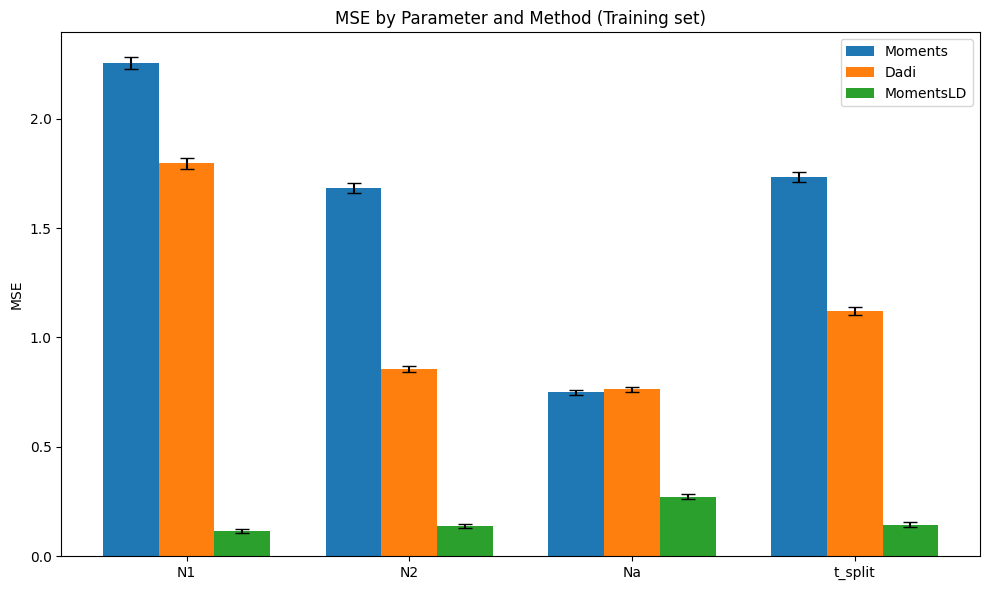

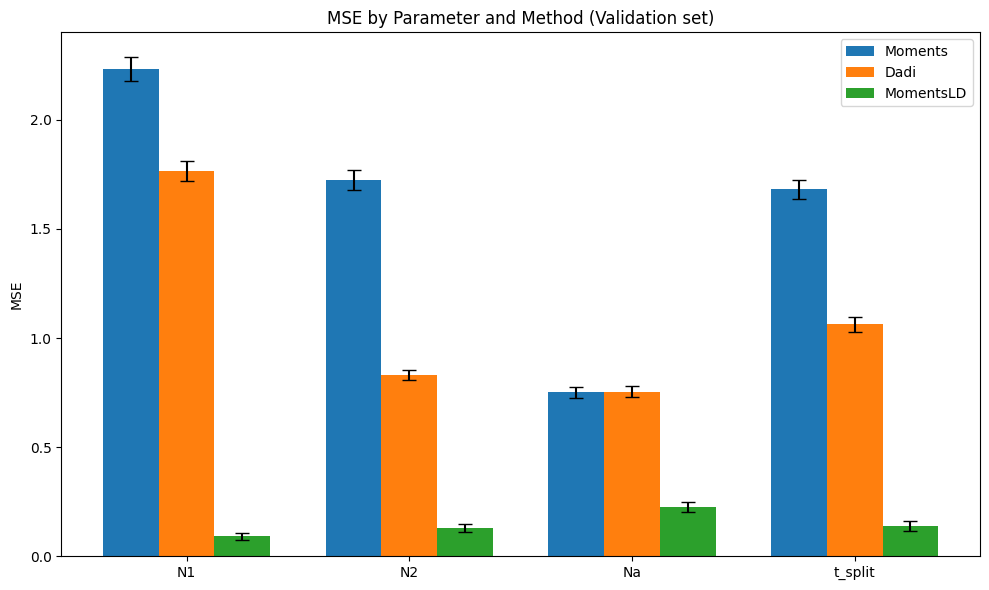

Training MSE Values and Standard Errors:
          Moments  Moments_std_err      Dadi  Dadi_std_err  MomentsLD  \
N1       2.254015         0.027179  1.796064      0.023633   0.115280   
N2       1.684775         0.022687  0.856122      0.011961   0.135852   
Na       0.748821         0.012768  0.763167      0.012364   0.271321   
t_split  1.735071         0.022385  1.120917      0.017218   0.143705   

         MomentsLD_std_err  
N1                0.008633  
N2                0.009313  
Na                0.012232  
t_split           0.011141  

Validation MSE Values and Standard Errors:
          Moments  Moments_std_err      Dadi  Dadi_std_err  MomentsLD  \
N1       2.234071         0.053251  1.766110      0.046791   0.090959   
N2       1.723560         0.045604  0.829150      0.023715   0.130053   
Na       0.752053         0.025191  0.754346      0.025265   0.225992   
t_split  1.682023         0.044007  1.063861      0.034119   0.138893   

         MomentsLD_std_err  
N1       

In [18]:
def calculate_mse_df(dataset_type, postprocessing_dict):
    """Calculate MSE and standard errors for a given dataset type (training or validation)"""
    params = ['N1', 'N2', 'Na', 't_split']
    methods = ['Moments', 'Dadi', 'MomentsLD']
    mse_values = {}
    mse_errors = {}

    for param in params:
        mse_values[param] = {}
        mse_errors[param] = {}
        target_col = f'simulated_params_{param}'
        target_values = postprocessing_dict[dataset_type]['normalized_targets'][target_col]
        
        for method in methods:
            if method in ['Moments', 'Dadi']:
                # Pool predictions from both replicates
                predictions = np.concatenate([
                    postprocessing_dict[dataset_type]['normalized_predictions'][f'{method}_rep1_{param}'],
                    postprocessing_dict[dataset_type]['normalized_predictions'][f'{method}_rep2_{param}']
                ])
                # Repeat targets for both replicates
                targets = np.tile(target_values, 2)
            else:  # MomentsLD
                predictions = postprocessing_dict[dataset_type]['normalized_predictions'][f'MomentsLD_{param}']
                targets = target_values

            # Calculate MSE for each simulation
            squared_errors = (predictions - targets) ** 2
            
            # Mean MSE across all simulations
            mse_values[param][method] = np.mean(squared_errors)
            
            # Standard error of MSE across simulations
            mse_errors[param][method] = np.std(squared_errors) / np.sqrt(len(squared_errors))

    # Create DataFrame
    result_df = pd.DataFrame({
        'Moments': [mse_values[p]['Moments'] for p in params],
        'Moments_std_err': [mse_errors[p]['Moments'] for p in params],
        'Dadi': [mse_values[p]['Dadi'] for p in params],
        'Dadi_std_err': [mse_errors[p]['Dadi'] for p in params],
        'MomentsLD': [mse_values[p]['MomentsLD'] for p in params],
        'MomentsLD_std_err': [mse_errors[p]['MomentsLD'] for p in params]
    }, index=params)
    
    return result_df

def plot_mse_comparison(result_df, dataset_type):
    """Create grouped bar plot for MSE comparison"""
    params = result_df.index
    x = np.arange(len(params))
    width = 0.25

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars with error bars
    rects1 = ax.bar(x - width, result_df['Moments'], width, 
                  yerr=result_df['Moments_std_err'],
                  label='Moments', capsize=5)
    rects2 = ax.bar(x, result_df['Dadi'], width,
                  yerr=result_df['Dadi_std_err'],
                  label='Dadi', capsize=5)
    rects3 = ax.bar(x + width, result_df['MomentsLD'], width,
                  yerr=result_df['MomentsLD_std_err'],
                  label='MomentsLD', capsize=5)

    ax.set_ylabel('MSE')
    ax.set_title(f'MSE by Parameter and Method ({dataset_type} set)')
    ax.set_xticks(x)
    ax.set_xticklabels(params)
    ax.legend()

    plt.tight_layout()
    return fig

# Calculate MSE for both datasets
train_df = calculate_mse_df('training', postprocessing_dict)
val_df = calculate_mse_df('validation', postprocessing_dict)

# Create plots
train_fig = plot_mse_comparison(train_df, 'Training')
val_fig = plot_mse_comparison(val_df, 'Validation')

# Display plots
plt.show()

# Print DataFrames
print("Training MSE Values and Standard Errors:")
print(train_df)
print("\nValidation MSE Values and Standard Errors:")
print(val_df)

In [19]:
train_df.to_csv("/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_train.csv")
val_df.to_csv("/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_validation.csv")